# Visualising the Giro d'Italia 2016

Three graphical visuals available. Use the radio buttons to select from:
 -  Stage specific view
 -  Cumulative time view
 -  Tour rank per stage view

All three graphs can be viewed from the persepctive of an [individual rider](#Highlight-Individual-Rider) or from a [team](#Highlight-Team). Choice of riders or teams are available from the dropdown lists.

If you are viewing this on Github you will need to download the notebook, csv and accompanying python script and run locally to enable the interaction provided by Ipython widgets.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import graphGiro as gg
import pickle
%matplotlib inline

stage_names = pickle.load(open('Data/stage_names_G2016.pkl', 'rb'))

df = pd.read_csv('Data/Giro-2016.csv')
gg.finishers_only(df)

In [4]:
t_cols, median_t_times = gg.collect_median_times(df, 't')
s_cols, median_s_times = gg.collect_median_times(df, 's')
r_cols = [col for col in df.columns if col[0] == 'r']

df = gg.create_median_df(df, t_cols, median_t_times)
df = gg.create_median_df(df, s_cols, median_s_times)

riders = df.Riders.sort_values().tolist()
teams = df.Team.sort_values().tolist()

## Highlight Individual Rider

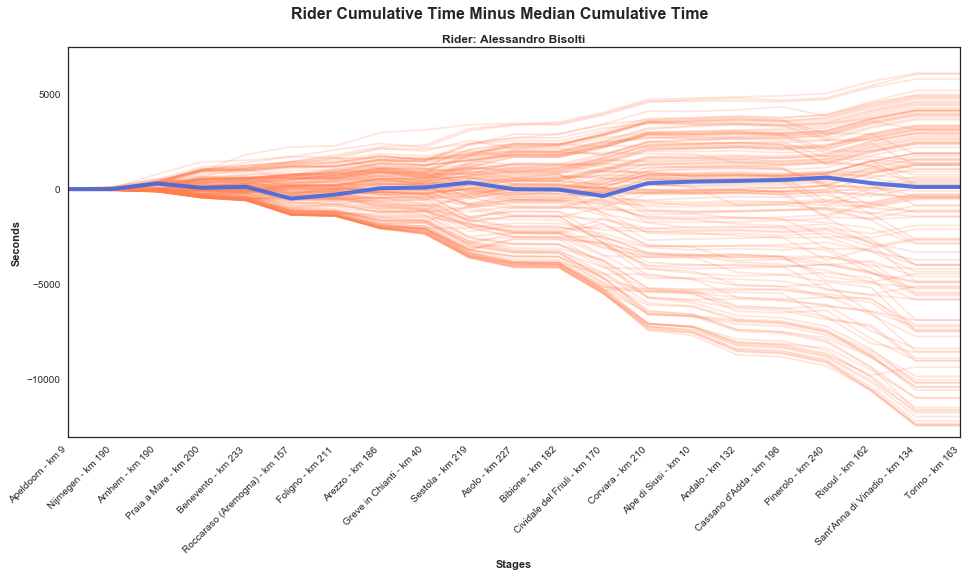

In [5]:
def plot_rider_graph(graph, rider):
    if graph == 'Total Cumulative Time':
        cols = t_cols
    elif graph == 'Rank per Stage':
        cols = r_cols
    else: cols = s_cols
    gg.plotgraph(df, cols, 21, stage_names, rider=rider)

cb1 = widgets.RadioButtons(description='Select Graph Option:',
                           options=['Total Cumulative Time','Time per Stage','Rank per Stage'])
cb1.height='70px'
cb1.width = '200px'

droplist = widgets.Select(description='Select Rider', options=riders)
widgets.interactive(plot_rider_graph, graph = cb1, rider=droplist)
display(widgets.HBox((cb1, droplist)))

## Highlight Team

In [6]:
def plot_team_graph(graph, team):
    if graph == 'Total Cumulative Time':
        cols = t_cols
    elif graph == 'Rank per Stage':
        cols = r_cols
    else: cols = s_cols
    gg.plotgraph(df, cols, 21, stage_names, team=team)

cb1 = widgets.RadioButtons(description='Select Graph Option:',
                           options=['Total Cumulative Time','Time per Stage','Rank per Stage'])
cb1.height='70px'
cb1.width = '200px'

droplist = widgets.Select(description='Select Team', options=teams)
widgets.interactive(plot_team_graph, graph = cb1, team=droplist)
display(widgets.HBox((cb1, droplist)))